In [200]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import astropy

plt.style.use('~/vedant.mplstyle')

In [201]:
from astropy.io import fits

In [202]:
f = fits.open('/n/holyscratch01/conroy_lab/vchandra/mage/data/kd6/reduced_v0/magellan_mage_A/Science/spec1d_mage0123-j0927m6335_MagE_20221220T081449.000.fits')

In [203]:
from scipy.signal import savgol_filter

In [204]:
order = 2

wl = f[order].data['OPT_WAVE']
fl = f[order].data['OPT_COUNTS']
fls = savgol_filter(fl, 3, 0)

wl2 = f[order+1].data['OPT_WAVE']
fl2 = f[order+1].data['OPT_COUNTS']
fls2 = savgol_filter(fl2, 3, 0)

wl3 = f[order-1].data['OPT_WAVE']
fl3 = f[order-1].data['OPT_COUNTS']
fls3 = savgol_filter(fl3, 3, 0)

(-25.0, 200.0)

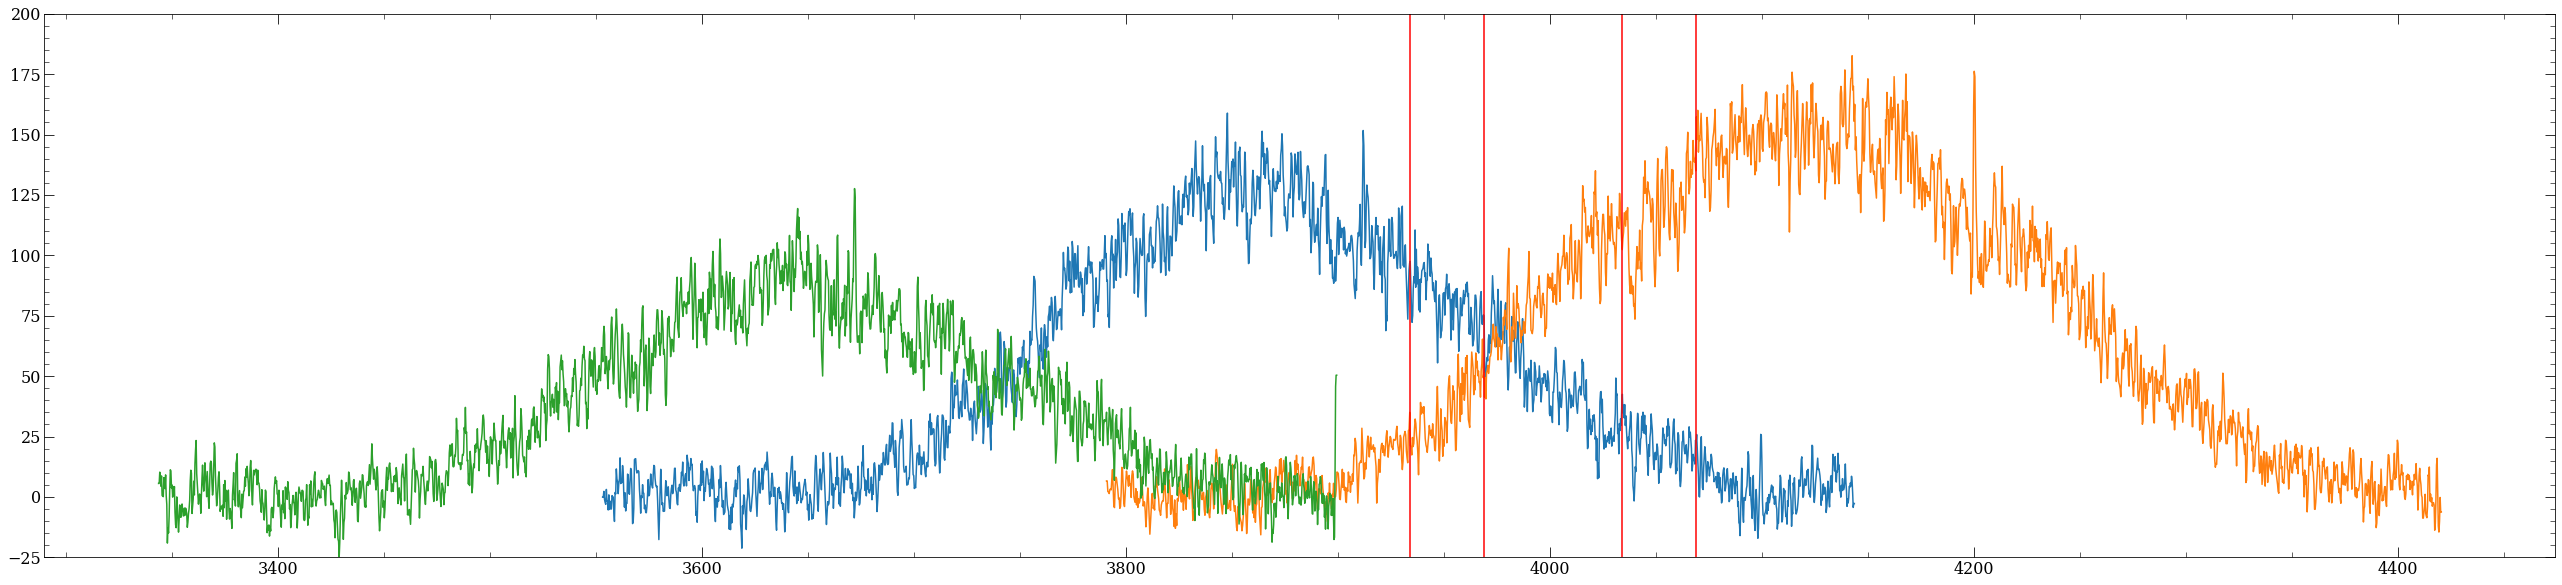

In [209]:
plt.figure(figsize = (45, 10))


plt.plot(wl, fls)
plt.plot(wl2, fls2)
plt.plot(wl3, fls3)
plt.axvline(3934, color = 'r')
plt.axvline(3969, color = 'r')

dlam = 100

plt.axvline(3934 + dlam, color = 'r')
plt.axvline(3969 + dlam, color = 'r')

plt.ylim(-25, 200)

In [173]:
f = fits.open('/n/holyscratch01/conroy_lab/vchandra/mage/data/kd6/reduced_v0/magellan_mage_A/Science/coadd/j0927m6335_coadd.fits')

fcal = fits.open('/n/holyscratch01/conroy_lab/vchandra/mage/data/kd6/reduced_v0/magellan_mage_A/Science/coadd/hip108327_coadd.fits')

In [174]:
order = 1

wl = f[order].data['wave']
fl = f[order].data['flux']

wlcal = fcal[order].data['wave']
flcal = fcal[order].data['flux']

In [175]:
sel = (wl > 3500) & (wl < 9000)

In [176]:
import scipy

In [177]:
nfl = fl / scipy.ndimage.gaussian_filter(fl, 150)
nflcal = flcal / scipy.ndimage.gaussian_filter(flcal, 150)

Text(0, 0.5, 'flux')

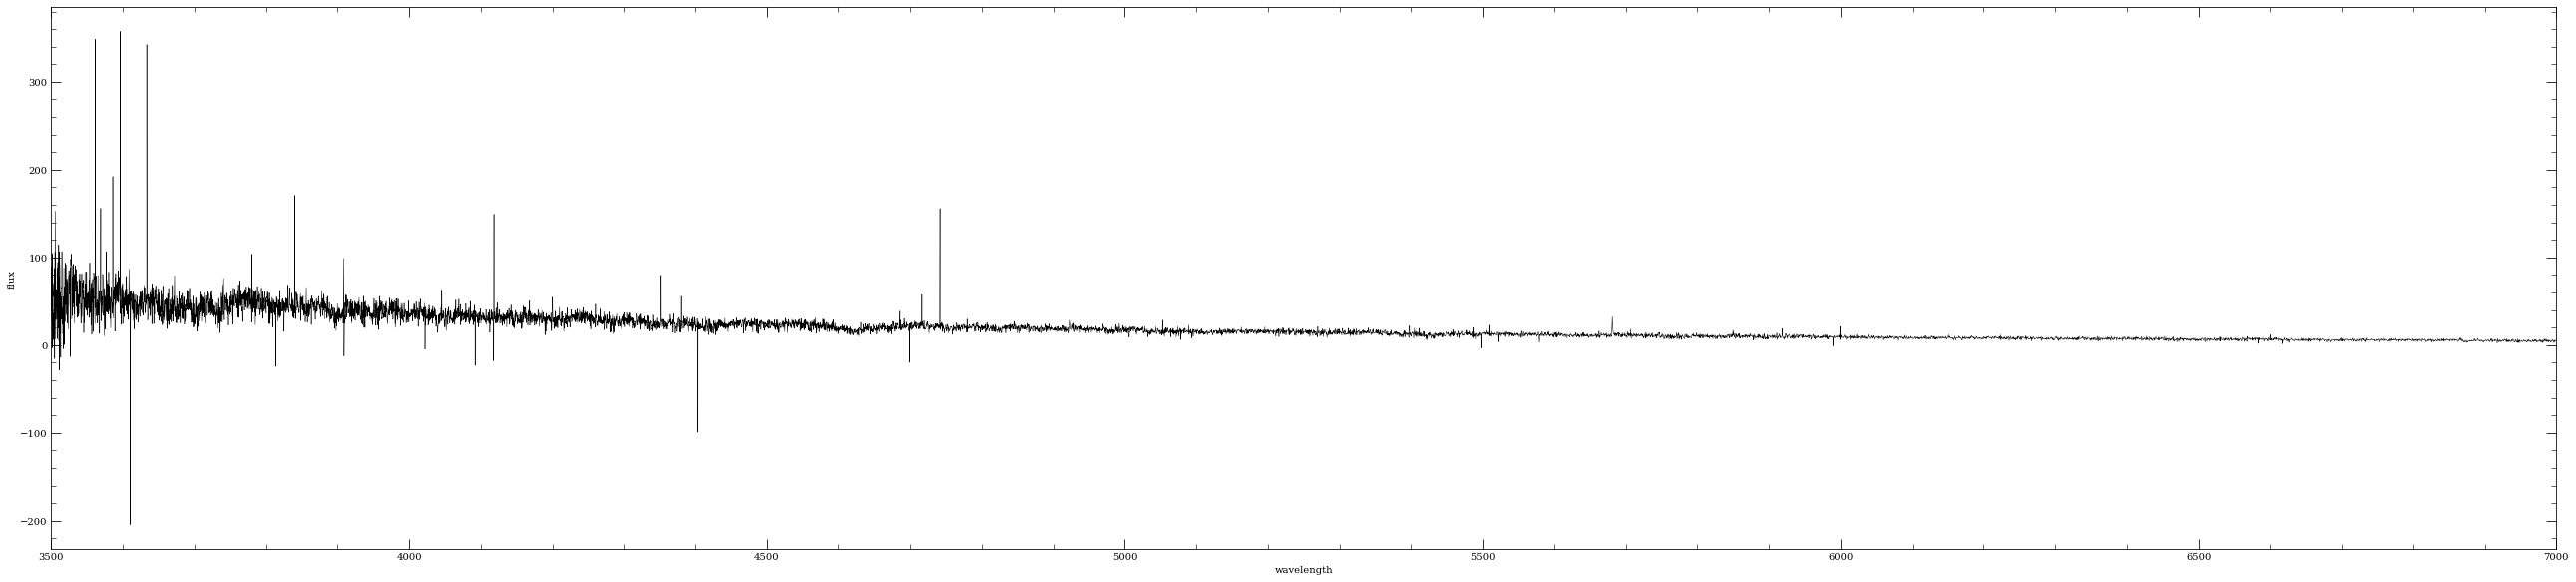

In [178]:
plt.figure(figsize = (45, 10))
plt.plot(wl[sel], fl[sel], color = 'k', lw = 0.5)
#plt.ylim(-5, 65)
plt.xlim(3500, 7000)
plt.xlabel('wavelength')
plt.ylabel('flux')

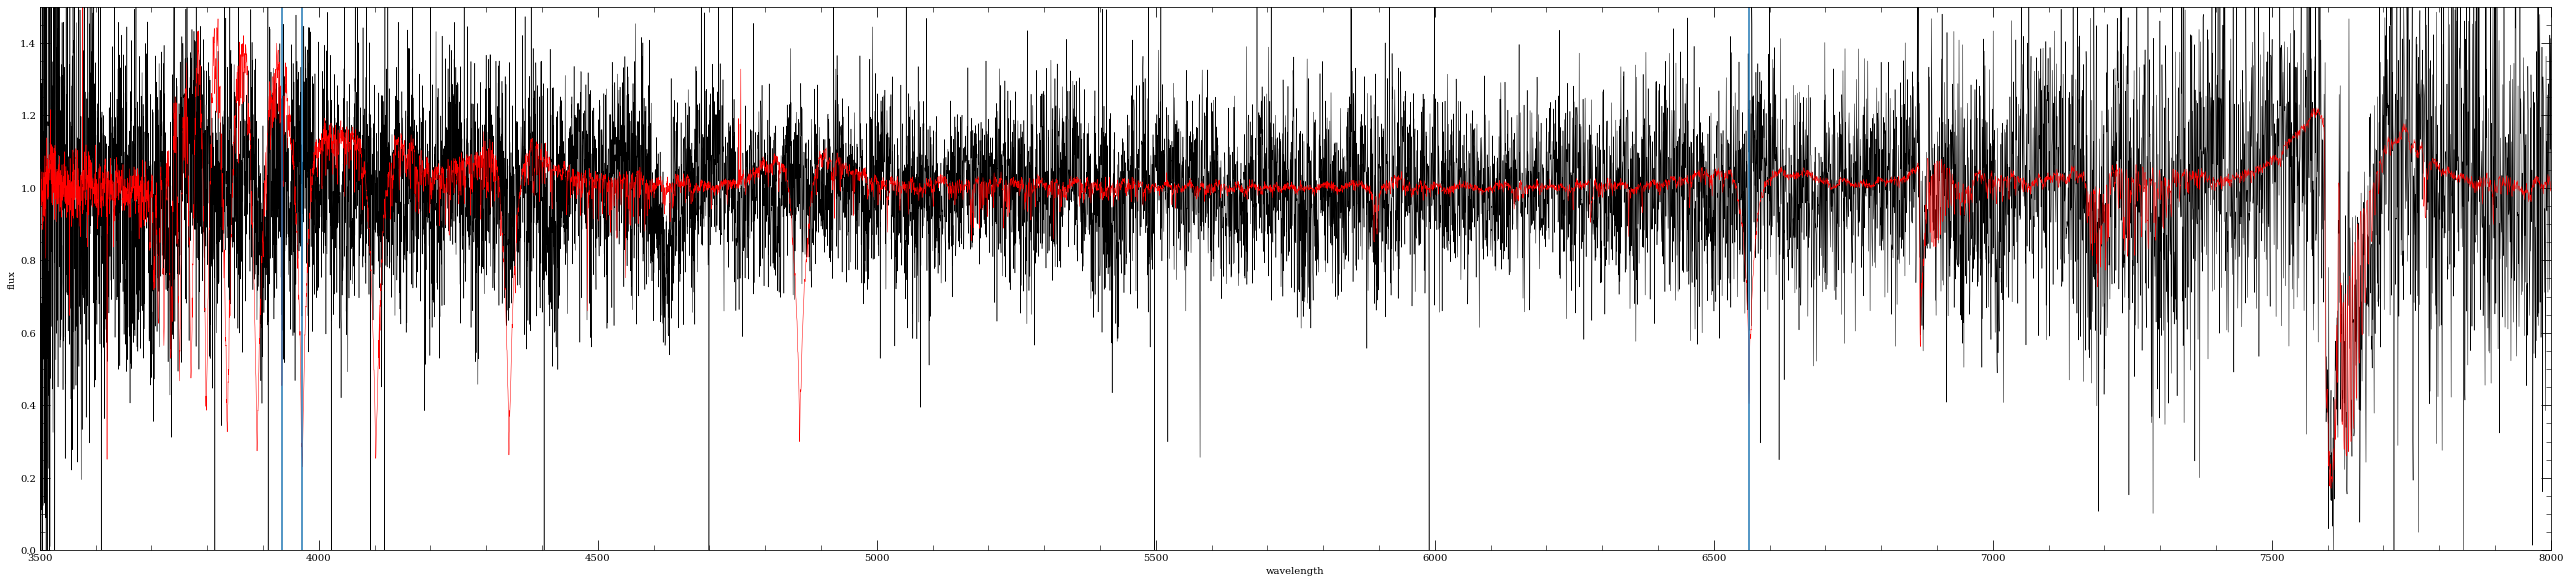

In [179]:
plt.figure(figsize = (45, 10))
plt.plot(wl[sel], nfl[sel], color = 'k', lw = 0.5)
plt.plot(wlcal, nflcal, color = 'r', lw = 0.5)

plt.ylim(0, 1.5)
plt.xlim(3500, 8000)
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.axvline(6563)

plt.axvline(3934)
plt.axvline(3969)

In [196]:
fls = savgol_filter(nfl[sel], 5, 0)

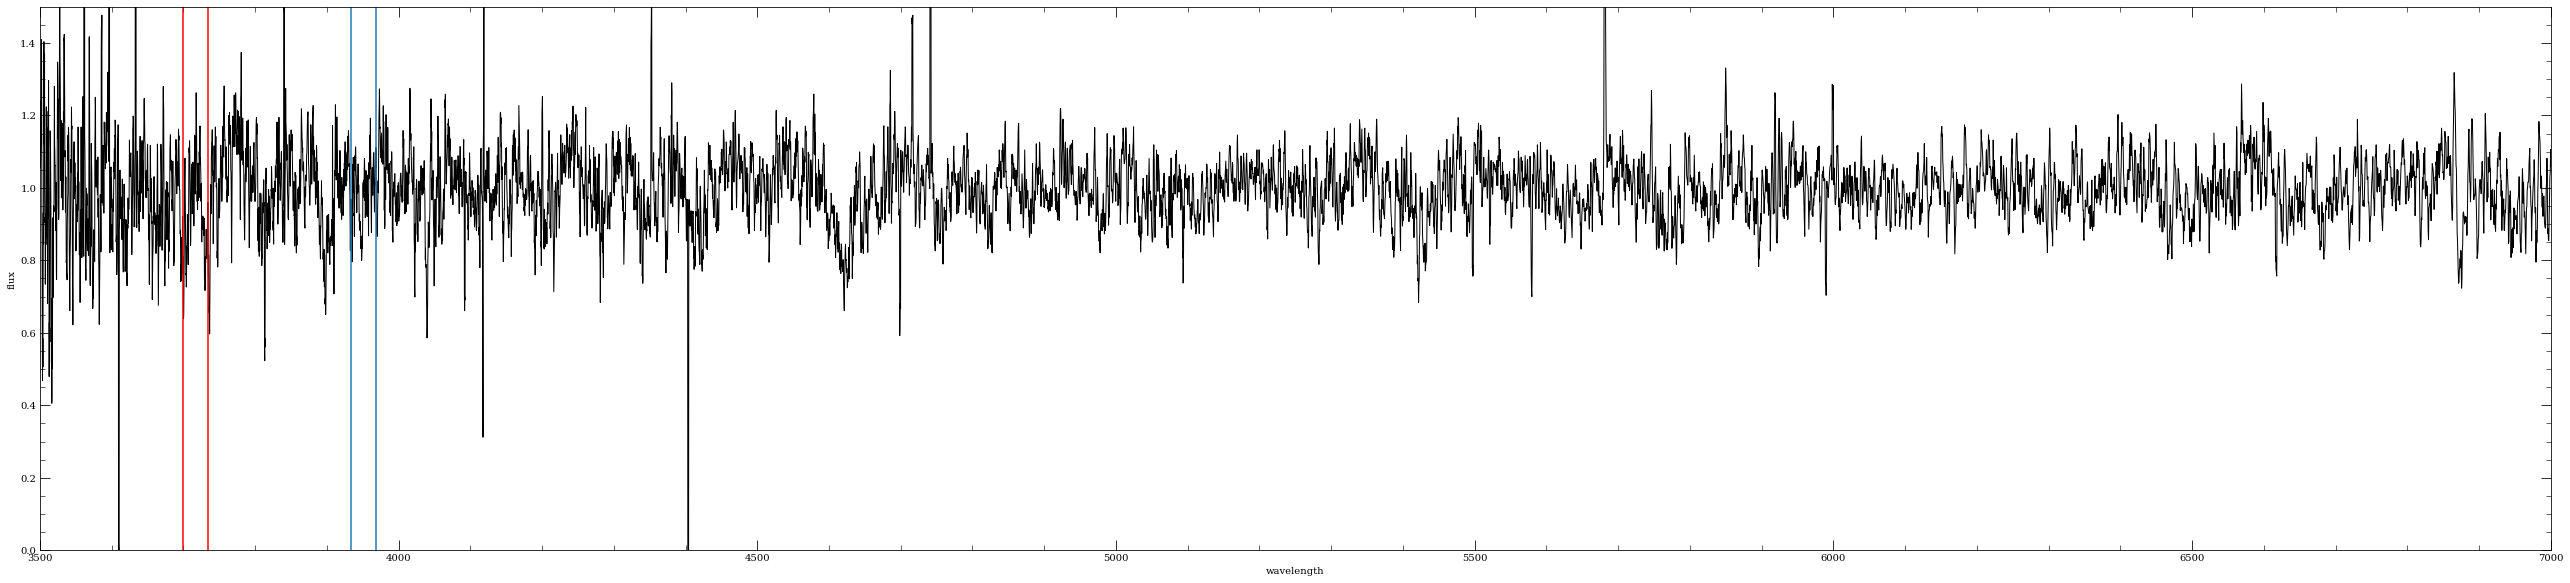

In [197]:
plt.figure(figsize = (45, 10))
plt.plot(wl[sel], fls, color = 'k', lw = 1)
plt.ylim(0, 1.5)
plt.xlim(3500, 7000)
plt.xlabel('wavelength')
plt.ylabel('flux')

dlam = -235

plt.axvline(3934)
plt.axvline(3969)

plt.axvline(3934 + dlam, color = 'r')
plt.axvline(3969 + dlam, color = 'r')

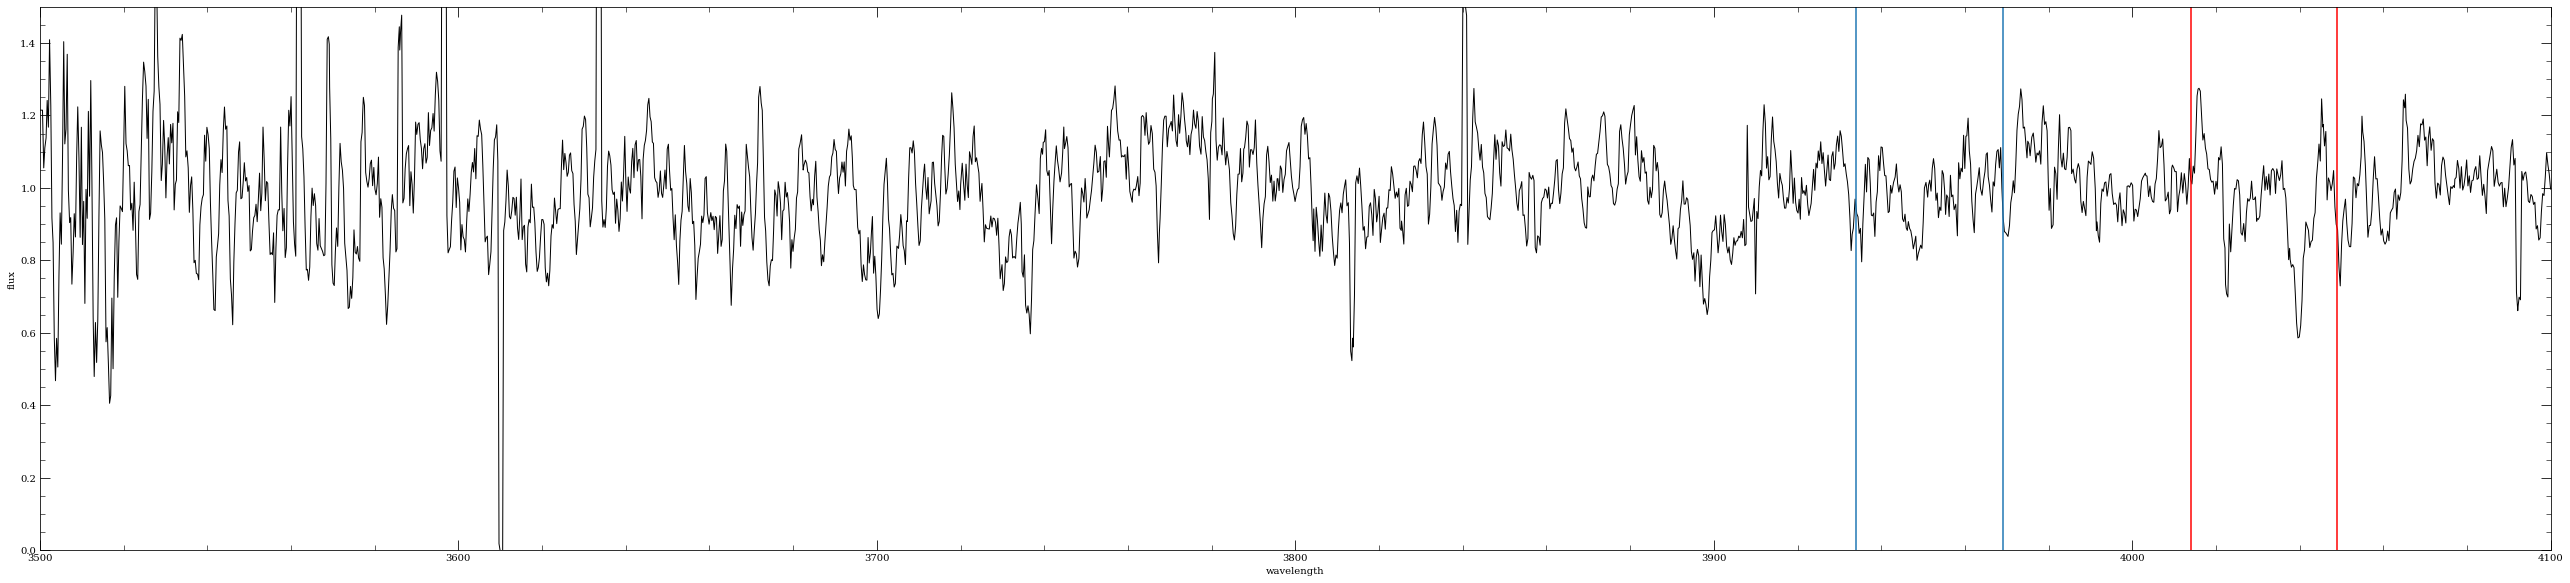

In [198]:
plt.figure(figsize = (45, 10))
plt.plot(wl[sel], fls, color = 'k', lw = 1)
plt.ylim(0, 1.5)
plt.xlim(3500, 4100)
plt.xlabel('wavelength')
plt.ylabel('flux')

dlam = 80

plt.axvline(3934)
plt.axvline(3969)

plt.axvline(3934 + dlam, color = 'r')
plt.axvline(3969 + dlam, color = 'r')

In [101]:
from astropy import constants as c, units as u

In [210]:
(c.c * 100/4000).to(u.km / u.s)

<Quantity 7494.81145 km / s>

In [130]:
hdu = 6

wvc1 = Table.read('/n/holyscratch01/conroy_lab/vchandra/mage/data/kd6/reduced_v0/magellan_mage_A/Masters/MasterWaveCalib_A_2_DET01.fits',
                 hdu = hdu)
wvc2 = Table.read('/n/holyscratch01/conroy_lab/vchandra/mage/data/kd6/reduced_v0/magellan_mage_A/Masters/MasterWaveCalib_A_4_DET01.fits',
                 hdu = hdu)

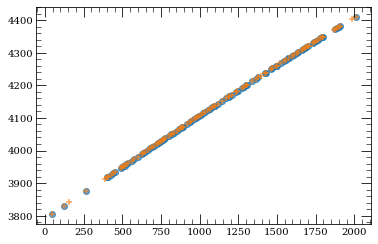

In [131]:
plt.scatter(wvc1['pixel_fit'][0], wvc1['wave_fit'][0], alpha = 0.7)
plt.scatter(wvc2['pixel_fit'][0], wvc2['wave_fit'][0], alpha = 0.7, marker = '+')

# plt.xlim(500, 750)
# plt.ylim(3600, 3800)

In [123]:
wvc2

pixel_fit [90],wave_fit [90],ion_bits [90],spec [2048],wave_soln [2048],tcent [129]
float64,float64,int32,float64,float64,float64
362.44570167154427 .. 2006.6494597472079,3660.6845295779594 .. 4132.83883825886,1024 .. 1024,-0.23836737416098686 .. 3.613906901971518,3553.02966084094 .. 4143.476024620282,362.44570167154427 .. 2006.6494597472079


In [72]:
import numpy as np
from astropy.table import Table,hstack,vstack,join
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import glob
import matplotlib.pyplot as plt
from scipy import constants
speedoflight = constants.c / 1000.0

datadir = '/n/holyscratch01/conroy_lab/vchandra/mage/'

with open('/n/home03/vchandra/outerhalo/08_mage/pipeline/control/redux.txt', 'r') as file:
    redux = file.read().replace('\n','')

def getdata(GaiaID = None, acat_id = None, date = None,
                mask_hbeta = False):    
    
    acat = Table.read(datadir + 'catalogs/mage_acat.fits')
    acat = acat.filled(99.0)
    
    if acat_id is not None:
        row = acat[acat['ACAT_ID'] == acat_id]
    elif GaiaID is not None and date is not None:
        row = acat[(acat['GAIAEDR3_ID'] == GaiaID) & (acat['date'] == date)]
    # elif index is not None:
    #     row = acat[acat['ACAT_ID'] == index][0]
    else:
        print('must pass either GaiaID+date or ACAT index!!')
        raise

    if len(row) == 1:
        row = row[0]
    elif len(row) == 0:
        print('no matches in table! cannot get data...')
        raise
    elif len(row) > 1:
        print('getdata query does not return unique row in ACAT')
        raise
    
    filepath = row['specfile']

    with fits.open(filepath) as f:

        wave = f[1].data['wave']
        flux = f[1].data['flux']
        ivar = f[1].data['ivar']
        mask = f[1].data['mask']

    ivar[mask == 0] = 0

    cond = (
        np.isfinite(flux) & 
        (ivar > 0.0) & 
        (wave > 4800) &
        (wave < 5500.0) &
        (ivar > 0)
    )

    wave   = wave[cond]
    flux   = flux[cond]
    ivar = ivar[cond]
    mask = mask[cond]

    res_p = np.loadtxt('/n/home03/vchandra/outerhalo/08_mage/pipeline/control/res_sigma_p.txt')
    wresl = res_p[0] * wave + res_p[1]

    medflux = np.median(flux)

    flux /= medflux
    ivar *= medflux**2

    return {'phot':row,'spec': {'wave': wave,
                                'flux': flux,
                                'ivar': ivar,
                                'wresl': wresl}}

In [73]:
data = getdata(acat_id = 0)

In [74]:
data['phot']['GAIAEDR3_G']

18.064178

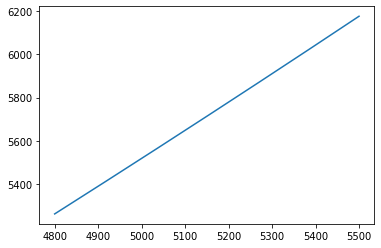

In [75]:
plt.plot(data['spec']['wave'], data['spec']['wave'] / (data['spec']['wresl'] * 2.355))

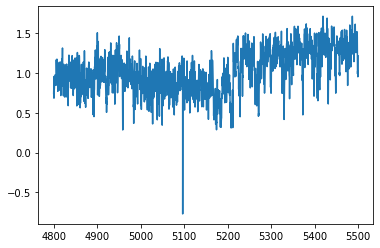

In [76]:
plt.plot(data['spec']['wave'], data['spec']['flux'])

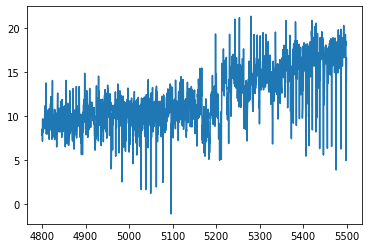

In [77]:
plt.plot(data['spec']['wave'], data['spec']['flux'] * np.sqrt(data['spec']['ivar']))